In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)
np.random.seed(42)

In [2]:
def generate_sequence():
    sequence = ["I", "had", "a", "sandwich", "for", "lunch", "yesterday", "and", "it", "was", "delicious"]
    return sequence

In [3]:
# class MarkovModel(torch.nn.Module):
#     def __init__(self, num_words, num_hidden):
#         super().__init__()
#         self.linear = torch.nn.Linear(num_hidden, num_words)

#     def forward(self, x):
#         return self.linear(x)

In [7]:
class MarkovModel(torch.nn.Module):
    def __init__(self, num_words, num_hidden):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_words, num_hidden)
        self.linear = torch.nn.Linear(num_hidden, num_words)

    def forward(self, x):
        x = self.embedding(x)
        return self.linear(x)

In [8]:
# Generate the training data
sequence = generate_sequence()
# Create a vocabulary of unique words in the sequence
vocab = list(set(sequence))

# Create a mapping from word to index
word_to_index = {word: index for index, word in enumerate(vocab)}

# Create a mapping from index to word
index_to_word = {index: word for index, word in enumerate(vocab)}

In [10]:
def train_model(model, sequence, learning_rate=1e-2, epochs=100):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = torch.nn.CrossEntropyLoss()
    losses = []
    accuracies = []

    for epoch in range(1, epochs + 1):
        total_loss = 0
        total_accuracy = 0

        # Loop through the words in the sequence
        for i in range(len(sequence) - 1):
#             # Convert the current and next words to tensors
#             current_word = torch.tensor([sequence[i]], dtype=torch.long)
#             next_word = torch.tensor([sequence[i + 1]], dtype=torch.long)

            # Convert the current and next words to integer indices
            current_word = torch.tensor([word_to_index[sequence[i]]], dtype=torch.long)
            next_word = torch.tensor([word_to_index[sequence[i + 1]]], dtype=torch.long)

            # Predict the probability of the next word
            logits = model(current_word)

            # Compute the cross-entropy loss and update the totals
            loss = criterion(logits, next_word)
            total_loss += loss.item()

            # Compute the accuracy and update the totals
            _, predicted = torch.max(logits, dim=1)
            total_accuracy += (predicted == next_word).sum().item()

            # Backpropagate the loss and update the model parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute the average loss and accuracy for the epoch .and update the relevant lists
        avg_loss = total_loss / (len(sequence) - 1)
        avg_accuracy = total_accuracy / (len(sequence) - 1)
        losses.append(avg_loss)
        accuracies.append(avg_accuracy)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: loss = {avg_loss:.4f}, accuracy = {avg_accuracy:.4f}")

    return model, losses, accuracies

In [12]:
# # Generate the training data
# sequence = generate_sequence()

# Define the number of words and the number of hidden units
num_words = len(set(sequence))
num_hidden = 10

# Initialize the Markov model
model = MarkovModel(num_words, num_hidden)

# Train the model
model, losses, accuracies = train_model(model, sequence, epochs=100)

Epoch 10: loss = 0.6117, accuracy = 0.9000
Epoch 20: loss = 0.1211, accuracy = 1.0000
Epoch 30: loss = 0.0418, accuracy = 1.0000
Epoch 40: loss = 0.0215, accuracy = 1.0000
Epoch 50: loss = 0.0132, accuracy = 1.0000
Epoch 60: loss = 0.0090, accuracy = 1.0000
Epoch 70: loss = 0.0066, accuracy = 1.0000
Epoch 80: loss = 0.0050, accuracy = 1.0000
Epoch 90: loss = 0.0040, accuracy = 1.0000
Epoch 100: loss = 0.0032, accuracy = 1.0000


In [24]:
sequence

['I',
 'had',
 'a',
 'sandwich',
 'for',
 'lunch',
 'yesterday',
 'and',
 'it',
 'was',
 'delicious']

In [23]:
for i in range(len(sequence)):
    print(index_to_word[torch.max(model(torch.tensor([word_to_index[sequence[i]]], dtype=torch.long)), dim=1)[1].item()])


had
a
sandwich
for
lunch
yesterday
and
it
was
delicious
sandwich


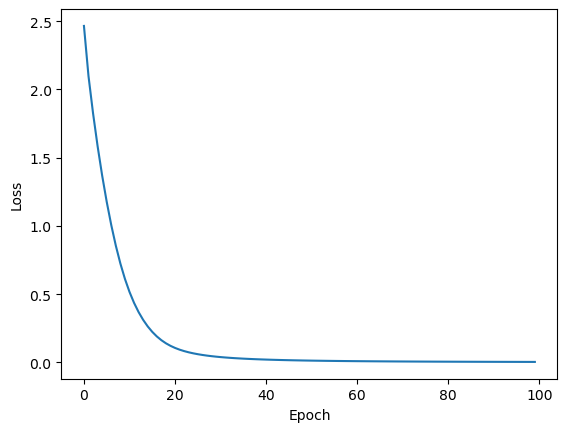

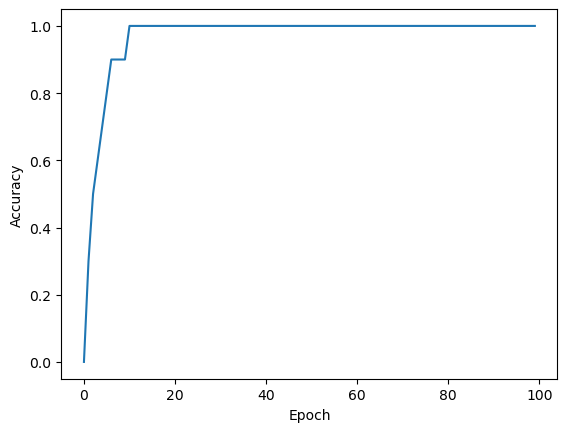

In [13]:
# Plot the training losses
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot the training accuracy
plt.plot(accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()